In [2]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("train.csv")


In [4]:
data = data.drop(["Cabin", "Embarked", "Name", "Ticket", "PassengerId"], axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [6]:
data = data.fillna(data['Age'].mean())

In [7]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


In [8]:
inputcols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
outputcols = ['Survived']

In [9]:
split = int(0.7*data.shape[0])
train_data_split = data[:split]
test_data = data[split:]
test_data.reset_index(drop=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,21.000000,0,0,7.8542
1,0,3,1,21.000000,0,0,16.1000
2,0,1,1,61.000000,0,0,32.3208
3,0,2,1,57.000000,0,0,12.3500
4,1,1,0,21.000000,0,0,77.9583
...,...,...,...,...,...,...,...
263,0,2,1,27.000000,0,0,13.0000
264,1,1,0,19.000000,0,0,30.0000
265,0,3,0,29.699118,1,2,23.4500
266,1,1,1,26.000000,0,0,30.0000


In [10]:
sktree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [11]:
sktree.fit(train_data_split[inputcols], train_data_split[outputcols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [12]:
sktree.predict(test_data[inputcols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [13]:
sktree.score(test_data[inputcols], test_data[outputcols])

0.8283582089552238

In [20]:
!pip install dtreeviz



   ---------------------------------------- 0.0/91.8 kB ? eta -:--:--
   ---------------------------------------- 91.8/91.8 kB 2.6 MB/s eta 0:00:00


In [14]:
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [15]:
dot_data = StringIO()
export_graphviz(sktree, out_file=dot_data, filled=True, rounded=True)


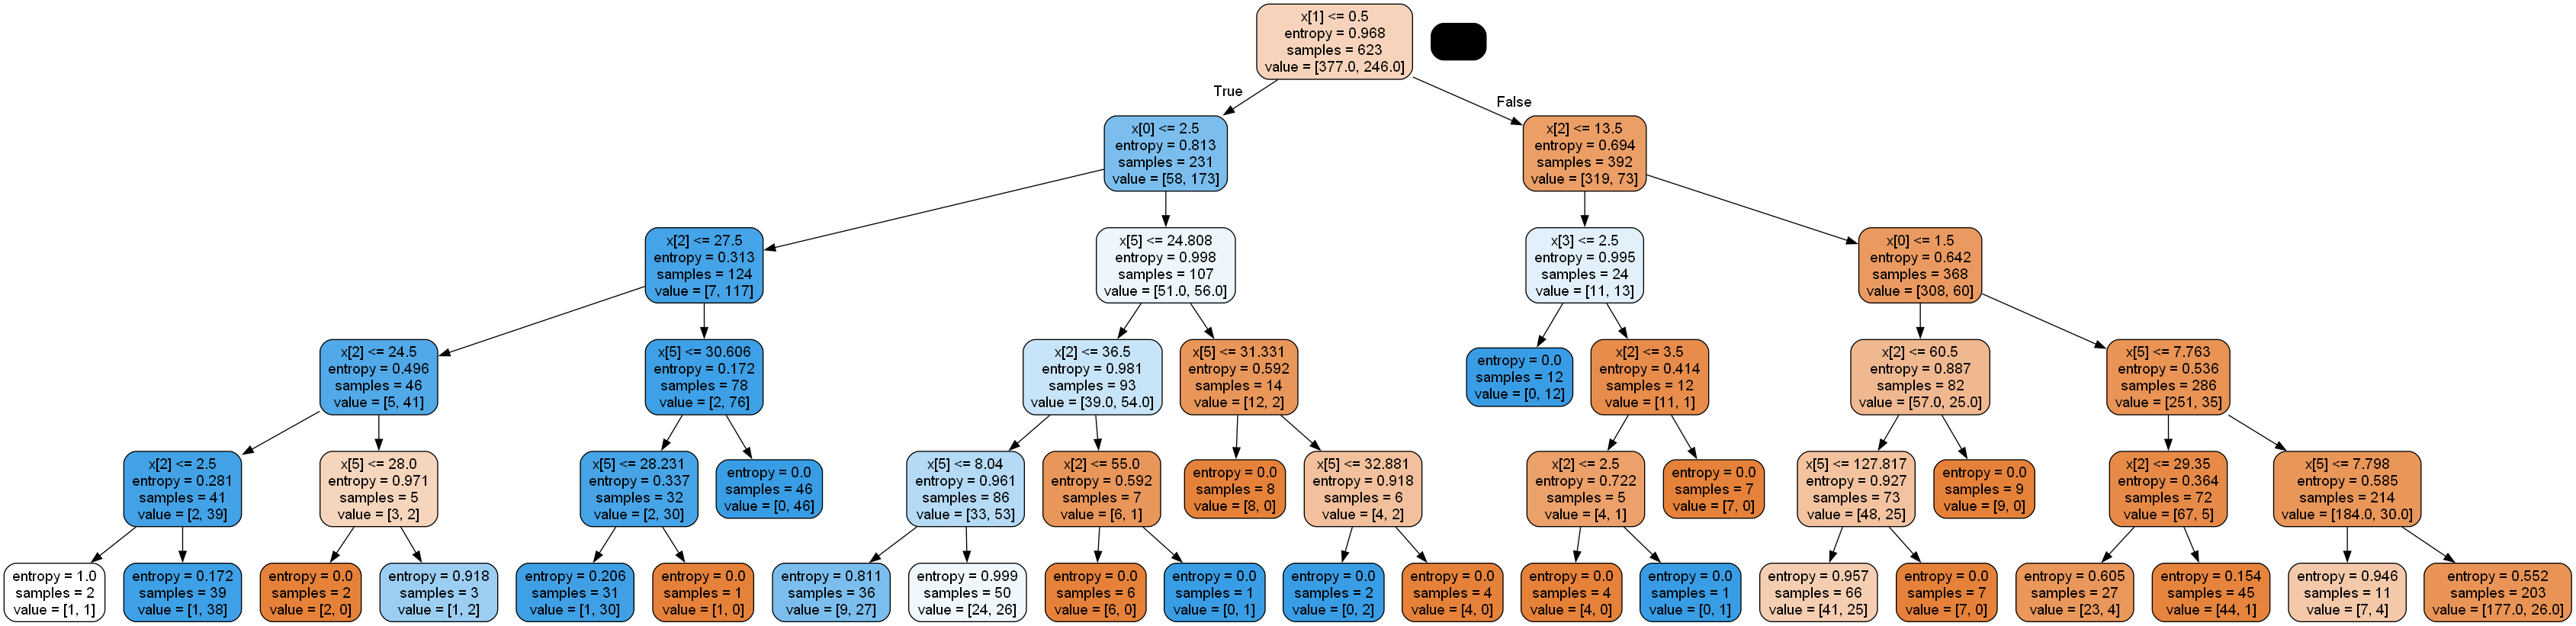

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [1]:
import graphviz

dot_data = export_graphviz(
    sktree,
    out_file=None,
    feature_names=inputcols,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the visualization as PDF or PNG
graph.view()  # Display the visualization


NameError: name 'export_graphviz' is not defined